In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The data file "Train.csv" is loaded


In [2]:
dataset= pd.read_csv("train.csv")

Data Exploration and Preprocessing

In [3]:
dataset.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [4]:
dataset.shape


(14999, 9)

In [5]:
dataset.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [7]:
dataset.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [8]:
#some integer columns are of object type(like views ,comment etc) so they are converted to integer first

dataset['views']=[int(i) if i.isnumeric() else np.NaN for i in dataset['views'] ]
dataset['likes']=pd.Series([int(i) if i.isnumeric() else np.NaN for i in dataset['likes'] ])
dataset['dislikes']=[int(i) if i.isnumeric() else np.NaN for i in dataset['dislikes'] ]
dataset['comment']=[int(i) if i.isnumeric() else np.NaN for i in dataset['comment'] ]

In [9]:
dataset.dtypes

#datatypes of numeric columns are corrected

vidid         object
adview         int64
views        float64
likes        float64
dislikes     float64
comment      float64
published     object
duration      object
category      object
dtype: object

In [10]:
dataset.info()

#There are some null values in data now 
#the null values were created when the numeric columns of object datatype were converted into numeric datatype but the cell had no numeric value
#for cell which had non numeric values like alphabets,special character etc were assigned null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vidid      14999 non-null  object 
 1   adview     14999 non-null  int64  
 2   views      14997 non-null  float64
 3   likes      14844 non-null  float64
 4   dislikes   14844 non-null  float64
 5   comment    14766 non-null  float64
 6   published  14999 non-null  object 
 7   duration   14999 non-null  object 
 8   category   14999 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 1.0+ MB


In [11]:
#Since the size of Data is very large (14999) and rows with null values are very low it is better to drop them 
dataset=dataset.dropna(axis=0)
dataset.shape

print("Loss of data = (14999-14637)/14999) x 100% =",(14999-14637)/14999 * 100,"%")

Loss of data = (14999-14637)/14999) x 100% = 2.4134942329488633 %


In [12]:
dataset.duplicated().sum()

#no duplicate rows are present

0

In [13]:
dataset.describe().T

#Provides summary statistics for the data

#using this we can see that there are spme outliers in data  beacause of vast difference between mean and median values , min and max values

,count,mean,std,min,25%,50%,75%,max
adview,14637.0,2066.029719,5.282706e+04,1.0,1.0,2.0,6.0,5429665.0
views,14637.0,711228.012844,2.731475e+06,49.0,31517.0,158668.0,583613.0,138047869.0
likes,14637.0,2785.841293,8.938491e+03,0.0,88.0,450.0,1863.0,283824.0
dislikes,14637.0,254.429391,1.029775e+03,0.0,7.0,38.0,167.0,49449.0
comment,14637.0,409.135547,1.511177e+03,0.0,7.0,46.0,224.0,75045.0


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['vidid']=encoder.fit_transform(dataset['vidid'])
dataset['published']=encoder.fit_transform(dataset['published'])
dataset['category']=encoder.fit_transform(dataset['category'])
dataset

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602.0,8523.0,363.0,1095.0,2168,PT7M37S,5
1,2741,2,1707.0,56.0,2.0,6.0,2185,PT9M30S,3
2,8138,1,2023.0,25.0,0.0,2.0,2094,PT2M16S,2
3,9005,6,620860.0,777.0,161.0,153.0,2119,PT4M22S,7
4,122,1,666.0,1.0,0.0,0.0,2091,PT31S,3
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949.0,1137.0,83.0,86.0,1683,PT6M10S,0
14995,11758,1,665673.0,3849.0,156.0,569.0,1838,PT3M56S,3
14996,13263,4,3479.0,16.0,1.0,1.0,1053,PT3M13S,1
14997,6736,1,963.0,0.0,0.0,0.0,222,PT26S,6


In [15]:
#creating a function to convert duration into an seconds having integer datatype

def clean_dur(str_duration):
    str_duration.upper().strip()
    str_duration=str_duration[2:]
    newstr_dur=""
    
    if "H" in str_duration:
        for i in range(len(str_duration)):
            if str_duration[i]=='H':
                hour_mark=i
                word=str_duration[:i]
                if word.isnumeric==False:
                    word="0"
    else:
        hour_mark=0
        word="0"
    newstr_dur+=word+":"
    
    if "M" in str_duration:
        for i in range(len(str_duration)):
            if str_duration[i]=='M':
                if hour_mark==0:
                    word=str_duration[:i]
                else:
                    word=str_duration[hour_mark+1:i]
                if word.isnumeric==False:
                    word="0"
                min_mark=i
    else:
        min_mark=0
        word="0"
    newstr_dur+=word+":"

    if "S" in str_duration:
        for i in range(len(str_duration)):
            if str_duration[i]=='S':
                if hour_mark==0 and min_mark==0:
                    word=str_duration[:i]
                elif min_mark==0:
                    word=str_duration[hour_mark+1:i]
                else:
                    word=str_duration[min_mark+1:i]
                if word=="P":
                    word="0"
    else:
        word="0"
    newstr_dur+=word

    return newstr_dur



In [16]:
def format_dur(new_dur):
    new_dur=new_dur.split(":")
    ans=(3600*int(new_dur[0]))+(60*int(new_dur[1]))+(int(new_dur[2]))
    return ans

In [17]:
dataset['duration']=dataset['duration'].apply(clean_dur)
dataset['duration']=dataset['duration'].apply(format_dur)

In [18]:
dataset

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602.0,8523.0,363.0,1095.0,2168,457,5
1,2741,2,1707.0,56.0,2.0,6.0,2185,570,3
2,8138,1,2023.0,25.0,0.0,2.0,2094,136,2
3,9005,6,620860.0,777.0,161.0,153.0,2119,262,7
4,122,1,666.0,1.0,0.0,0.0,2091,31,3
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949.0,1137.0,83.0,86.0,1683,370,0
14995,11758,1,665673.0,3849.0,156.0,569.0,1838,236,3
14996,13263,4,3479.0,16.0,1.0,1.0,1053,193,1
14997,6736,1,963.0,0.0,0.0,0.0,222,26,6


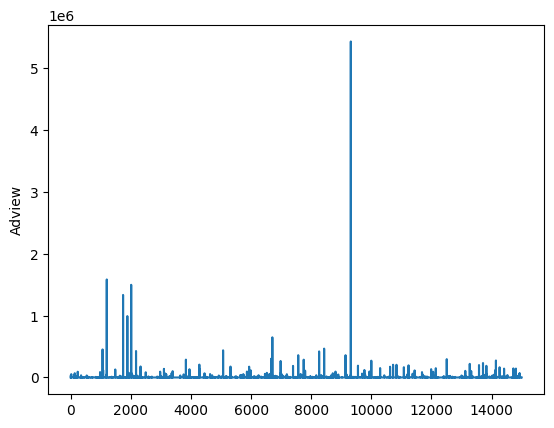

In [19]:
plt.plot(dataset['adview'])
plt.ylabel("Adview")
plt.show()

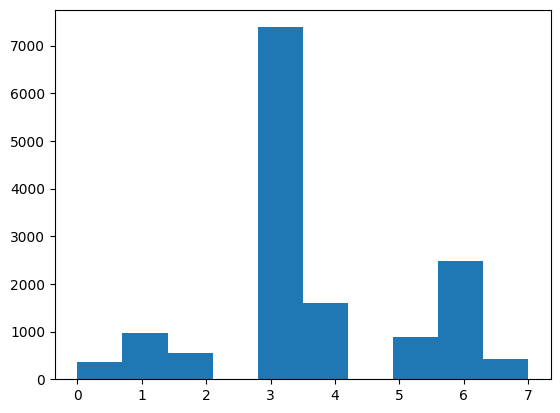

In [30]:
plt.hist(dataset['category'])
plt.show()

In [20]:
#using above visualization we can see that adview above 2000000 is an outlier which is most likely a mistake so it is better to drop it
dataset=dataset[dataset['adview']<=2000000]
dataset.shape

(14636, 9)

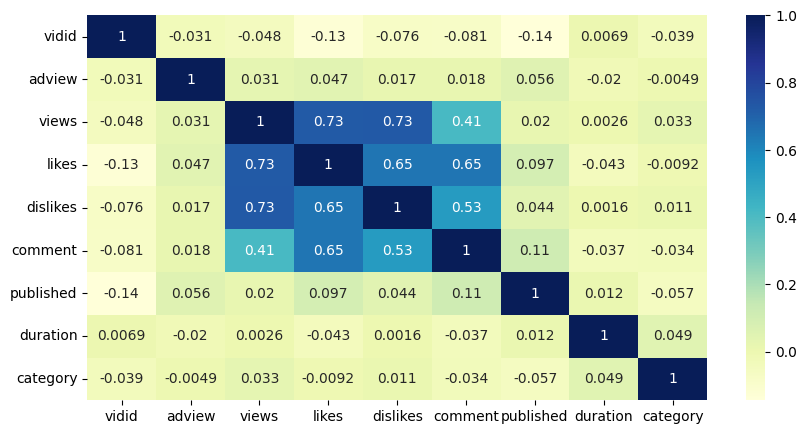

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [31]:
# preparing the data for model

#here adview is our target variable ,i.e., the variable that is required to be predicted by the model

#the rest of the columns are ou feature variables which helps in predicting the target variable so they need to be seperated

target=dataset['adview']
features=dataset.drop(columns="adview")


In [32]:
target.head()

0    40
1     2
2     1
3     6
4     1
Name: adview, dtype: int64

In [33]:
features.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,5912,1031602.0,8523.0,363.0,1095.0,2168,457,5
1,2741,1707.0,56.0,2.0,6.0,2185,570,3
2,8138,2023.0,25.0,0.0,2.0,2094,136,2
3,9005,620860.0,777.0,161.0,153.0,2119,262,7
4,122,666.0,1.0,0.0,0.0,2091,31,3


In [34]:
# "vidid" is useless in this case as they are unique for each entry so they can be dropped

features.drop(columns="vidid",inplace=True)

In [35]:
# Splitting the data into training ,testing and validation sets

from sklearn.model_selection import train_test_split
feature_train,feature_test,target_train,target_test= train_test_split(features,target,test_size=0.2,random_state=42)

print("size of training data : feature =",feature_train.shape,"and target =",target_train.shape)
print("size of testing data : feature =",feature_test.shape,"and target =",target_test.shape)

size of training data : feature = (11708, 7) and target = (11708,)
size of testing data : feature = (2928, 7) and target = (2928,)


Scaling Data

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

feature_train=scaler.fit_transform(feature_train)
feature_test=scaler.fit_transform(feature_test)


In [39]:
# Creating a function to predict from model

from sklearn import metrics

def model_prediction(xtest,ytest,model):
    y_pred=model.predict(xtest)
    print("Mean square error:",metrics.mean_squared_error(ytest,y_pred))
    print("Mean absolute error:",metrics.mean_absolute_error(ytest,y_pred))
    print("Root mean square error:",np.sqrt(metrics.mean_squared_error(ytest,y_pred)))
    print("R2 score:",metrics.r2_score(ytest,y_pred))


In [40]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
linear_model.fit(feature_train,target_train)

print("for testing:")
model_prediction(feature_test,target_test,linear_model)


for testing:
Mean square error: 835663131.1210337
Mean absolute error: 3707.378005824532
Root mean square error: 28907.83857573986
R2 score: -0.00584155456343316


In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_model=DecisionTreeRegressor()
tree_model.fit(feature_train,target_train)

print("for testing:")
model_prediction(feature_test,target_test,tree_model)



for testing:
Mean square error: 1200455563.4754097
Mean absolute error: 2828.098360655738
Root mean square error: 34647.59101980121
R2 score: -0.44492205672711904


In [44]:
from sklearn.ensemble import RandomForestRegressor
n_est=100
min_samp_s=2
min_samp_l=1
forest_model=RandomForestRegressor(n_estimators=n_est,min_samples_split=min_samp_s,min_samples_leaf=min_samp_l)
forest_model.fit(feature_train,target_train)

print("for testing:")
model_prediction(feature_test,target_test,forest_model)


for testing:
Mean square error: 553904721.8740649
Mean absolute error: 3111.850218579235
Root mean square error: 23535.18051500912
R2 score: 0.33329548022247046


In [224]:
from sklearn.svm import SVR

svm_model=SVR()
svm_model.fit(feature_train,target_train)

print("for testing:")
model_prediction(feature_test,target_test,svm_model)

for testing:
Mean square error: 1414180352.763027
Mean absolute error: 1854.521888125659
Root mean square error: 37605.58938193932
R2 score: -0.0024328624015514944


In [238]:
from sklearn.ensemble import AdaBoostRegressor

adr_model=AdaBoostRegressor()

adr_model.fit(feature_train,target_train)

print("for testing:")
model_prediction(feature_test,target_test,adr_model)

for testing:
Mean square error: 11575940123.22322
Mean absolute error: 78752.43233941939
Root mean square error: 107591.54299118133
R2 score: -12.933319749857029


In [239]:
#Neural Network
from tensorflow import keras
from keras.layers import Dense

ann= keras.models.Sequential([
    Dense(6,activation='relu',
          input_shape=feature_train.shape[1:]),
    Dense(6,activation='relu'), Dense(1)])

optimizer=keras.optimizers.Adam()
loss=keras.losses.MeanSquaredError()
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(feature_train,target_train,epochs=100)
ann.summary()
print("for testing:")
model_prediction(feature_test,target_test,ann)

Epoch 1/100


D:\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 350625024.0000 - mean_squared_error: 350625024.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 694806656.0000 - mean_squared_error: 694806656.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 567428352.0000 - mean_squared_error: 567428352.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1447448320.0000 - mean_squared_error: 1447448320.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1535739776.0000 - mean_squared_error: 1535739776.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 519709600.0000 - mean_squared_error: 519709600.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 467086496.0000 - mean_squared_error: 467086496.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1288104576.0000 - mean_squared_error: 1288104576.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1500065536.0000 - mean_squared_error: 150

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

for testing:
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean square error: 828101770.5767815
Mean absolute error: 3140.1031943978182
Root mean square error: 28776.757471556477
R2 score: 0.003259599208831787


Saving the best model

In [243]:
import joblib

joblib.dump(forest_model,"randomforest_adview.pkl")

#saving artificial neural network model

ann.save("ann_youtubeadview.h5")

In [239]:
import joblib

rmodel=joblib.load("decisiontree_adview.pkl")

In [241]:
rmodel.predict(feature_test)

array([21.37,  7.85,  5.59, ...,  5.25,  5.88, 16.22])

In [242]:
feature_test.shape

(2928, 7)